#📌 Extracción

In [2]:
# STEP 1: EXTRACT
import pandas as pd
import json

# Load the data of TelecomX "API"
with open('TelecomX_Data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Load the data into a DataFrame
df = pd.DataFrame(data)
print('Data extracted successfully')

# Show the first few rows of the DataFrame
df.head()

Data extracted successfully


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
# STEP 2: TRANSFORM
# Clean and transform the data

# Convert columns with dictionaries to string to remove duplicates
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        df[col] = df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

# Remove duplicates and null values
df = df.drop_duplicates()
df = df.dropna()

# Show the transformed data
print('Data transformed successfully')
df.info()

Data transformed successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#📊 Carga y análisis

In [4]:
# STEP 3: LOAD
# Organize the data for analysis and visualization

if not df.empty:
    # Save the cleaned DataFrame to a CSV file
    df.to_csv('TelecomX_cleaned_data.csv', index=False)
    print('Data ready for analysis and visualization')
else:
    print('No data available for loading')

# Review the loaded data
df.info()

Data ready for analysis and visualization
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# EXPAND JSON COLUMNS FOR ANALYSIS
# Convert JSON columns back to dictionaries and expand them

# Expand the 'customer' column
customer_df = df['customer'].apply(json.loads).apply(pd.Series)
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

# Expand the 'phone' column
phone_df = df['phone'].apply(json.loads).apply(pd.Series)
phone_df.columns = [f"phone_{c}" for c in phone_df.columns]
df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

# Expand the 'internet' column
internet_df = df['internet'].apply(json.loads).apply(pd.Series)
internet_df.columns = [f"internet_{c}" for c in internet_df.columns]
df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)

# Expand the 'account' column
account_df = df['account'].apply(json.loads).apply(pd.Series)
account_df.columns = [f"account_{c}" for c in account_df.columns]
df = pd.concat([df.drop('account', axis=1), account_df], axis=1)

print('Columns expanded successfully')
print(f'New DataFrame dimensions: {df.shape}')
df.info()

Columnas expandidas correctamente
Nuevas dimensiones del DataFrame: (7267, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerID                 7267 non-null   object
 1   Churn                      7267 non-null   object
 2   gender                     7267 non-null   object
 3   SeniorCitizen              7267 non-null   int64 
 4   Partner                    7267 non-null   object
 5   Dependents                 7267 non-null   object
 6   tenure                     7267 non-null   int64 
 7   phone_PhoneService         7267 non-null   object
 8   phone_MultipleLines        7267 non-null   object
 9   internet_InternetService   7267 non-null   object
 10  internet_OnlineSecurity    7267 non-null   object
 11  internet_OnlineBackup      7267 non-null   object
 12  internet_DeviceProtection  7267 non-nul

#📄Informe final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerID                 7267 non-null   object
 1   Churn                      7267 non-null   object
 2   gender                     7267 non-null   object
 3   SeniorCitizen              7267 non-null   int64 
 4   Partner                    7267 non-null   object
 5   Dependents                 7267 non-null   object
 6   tenure                     7267 non-null   int64 
 7   phone_PhoneService         7267 non-null   object
 8   phone_MultipleLines        7267 non-null   object
 9   internet_InternetService   7267 non-null   object
 10  internet_OnlineSecurity    7267 non-null   object
 11  internet_OnlineBackup      7267 non-null   object
 12  internet_DeviceProtection  7267 non-null   object
 13  internet_TechSupport       7267 non-null   object
 14  internet

None

,SeniorCitizen,tenure
count,7267.000000,7267.000000
mean,0.162653,32.346498
std,0.369074,24.571773
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


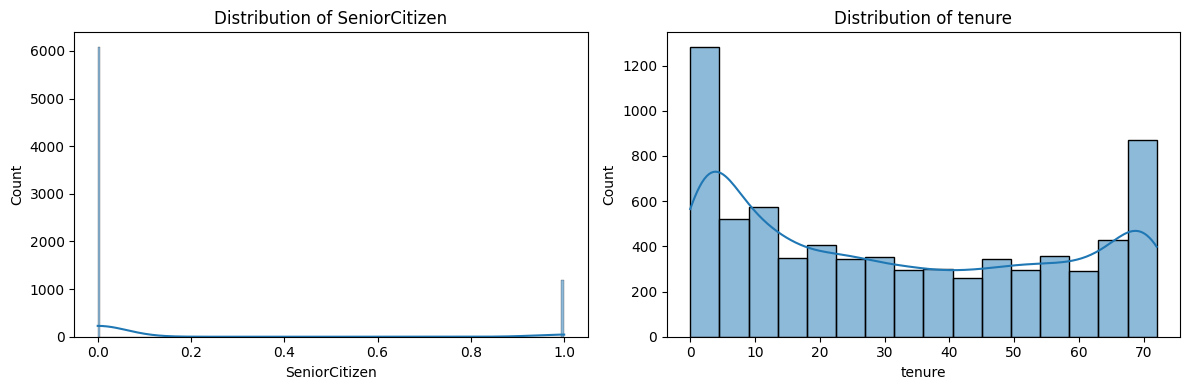

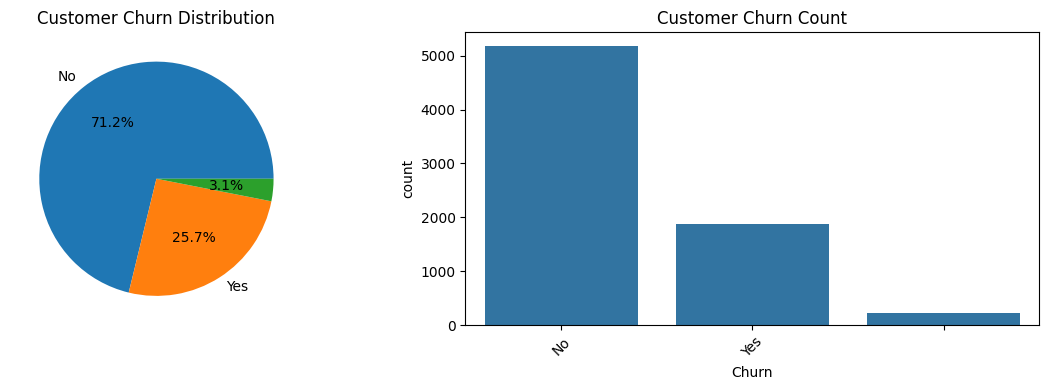

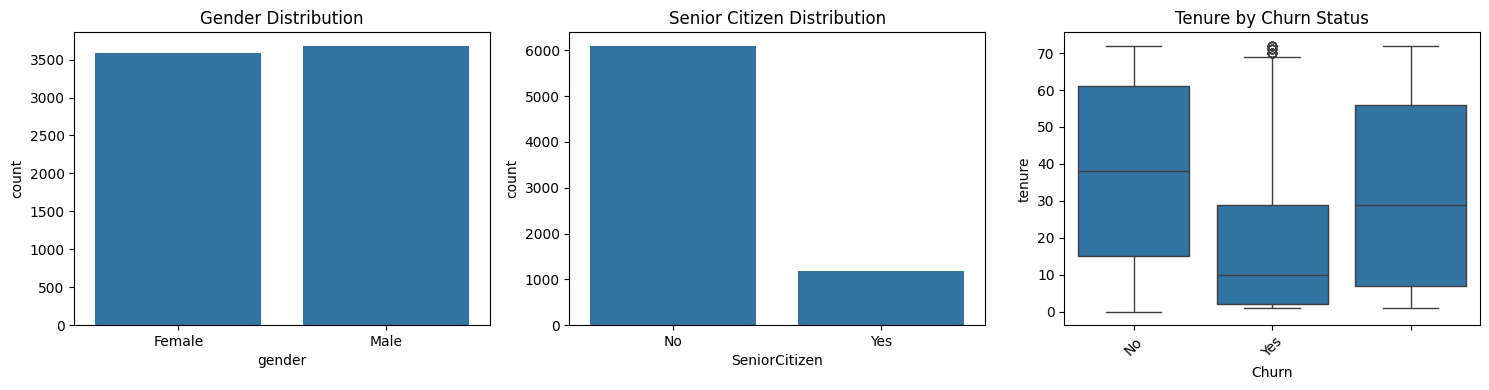

Data analysis completed successfully


In [ ]:
# EXPLORATORY DATA ANALYSIS AND VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

if not df.empty:
    # Show general information and statistics
    display(df.info())
    display(df.describe())
    
    # ANALYSIS 1: Distribution of the first numeric column
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        plt.figure(figsize=(12,4))
        
        plt.subplot(1,2,1)
        sns.histplot(df[num_cols[0]], kde=True)
        plt.title(f'Distribution of {num_cols[0]}')
        
        plt.subplot(1,2,2)
        sns.histplot(df[num_cols[1]], kde=True)
        plt.title(f'Distribution of {num_cols[1]}')
        
        plt.tight_layout()
        plt.show()
    
    # ANALYSIS 2: Churn Analysis
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    churn_counts = df['Churn'].value_counts()
    plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
    plt.title('Customer Churn Distribution')
    
    plt.subplot(1,2,2)
    sns.countplot(data=df, x='Churn')
    plt.title('Customer Churn Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # ANALYSIS 3: Customer Demographics
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,3,1)
    sns.countplot(data=df, x='gender')
    plt.title('Gender Distribution')
    
    plt.subplot(1,3,2)
    sns.countplot(data=df, x='SeniorCitizen')
    plt.title('Senior Citizen Distribution')
    plt.xticks([0,1], ['No', 'Yes'])
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df, x='Churn', y='tenure')
    plt.title('Tenure by Churn Status')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print('No data available to analyze or visualize')